<a href="https://colab.research.google.com/github/ShreyPandit/YOLO/blob/master/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Garima13a/YOLO-Object-Detection.git

Cloning into 'YOLO-Object-Detection'...
remote: Enumerating objects: 65, done.
remote: Total 65 (delta 0), reused 0 (delta 0), pack-reused 65
Unpacking objects: 100% (65/65), done.


In [3]:
cd YOLO-Object-Detection/

/content/YOLO-Object-Detection


In [0]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

In [6]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-03-30 11:49:52--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   278KB/s    in 12m 0s  

2020-03-30 12:01:54 (337 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



**Now Copy The file downloaded to the weight folder**


In [7]:
cfg_file = './cfg/yolov3.cfg'
weight_file = './weights/yolov3.weights'
namesfile = 'data/coco.names'
m = Darknet(cfg_file)
m.load_weights(weight_file)
class_names = load_class_names(namesfile)

# Taking a Look at The Neural Network

Now that the neural network has been setup, we can see what it looks like. We can print the network using the `.print_network()` function.

In [8]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

**RESIZING OUR IMAGE**

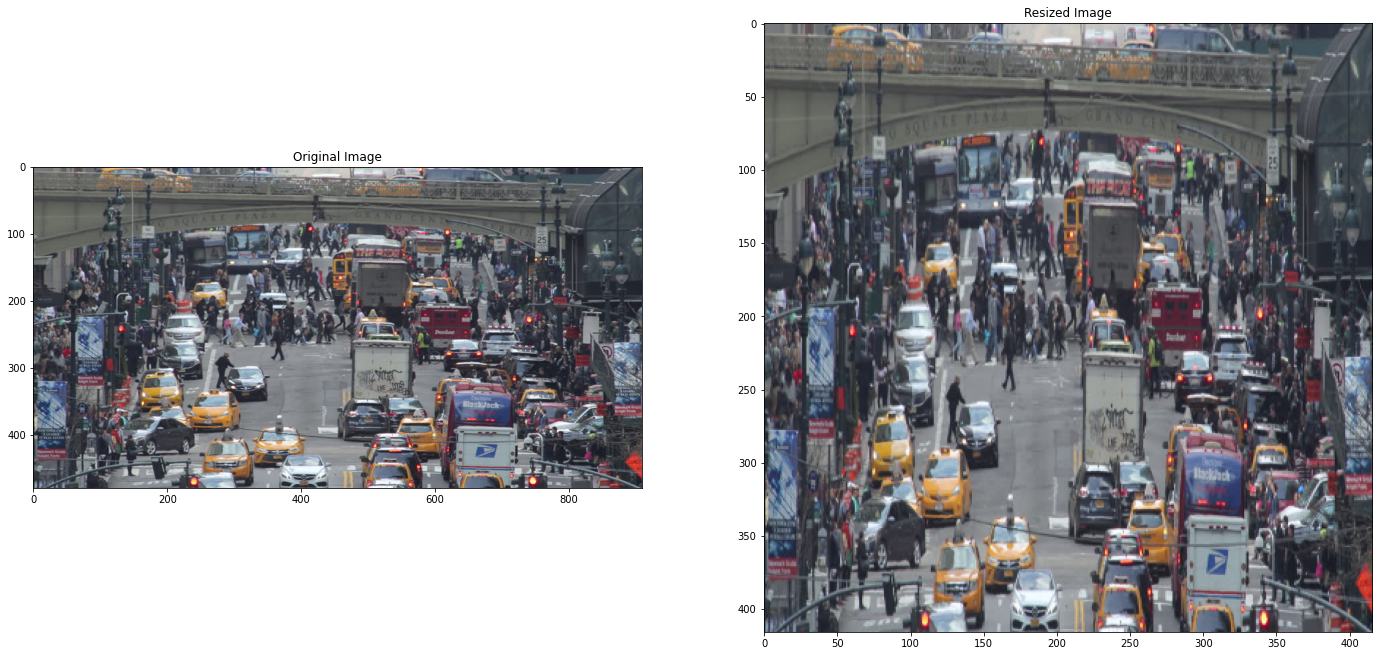

In [15]:

plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('./images/2.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

In [0]:
# Set the NMS threshold
nms_thresh = 0.6  

In [0]:
# Set the IOU threshold
iou_thresh = 0.4



It took 1.626 seconds to detect the objects in the image.

Number of Objects Detected: 34 

Objects Found and Confidence Level:

1. car: 0.999991
2. car: 0.999415
3. car: 0.999998
4. car: 0.999591
5. car: 0.999015
6. car: 0.999863
7. car: 0.998987
8. car: 0.999800
9. bus: 0.999923
10. bus: 0.992850
11. bus: 0.999348
12. truck: 0.790919
13. bus: 0.991992
14. person: 0.999998
15. bus: 0.999084
16. car: 0.997393
17. person: 0.999954
18. car: 0.999308
19. person: 1.000000
20. person: 0.999983
21. car: 0.957296
22. car: 0.999025
23. bus: 0.489758
24. person: 0.999937
25. car: 0.998106
26. person: 0.993144
27. car: 0.996837
28. car: 0.997936
29. person: 0.999999
30. car: 0.999583
31. truck: 0.683923
32. person: 0.999998
33. car: 0.996962
34. car: 0.999881


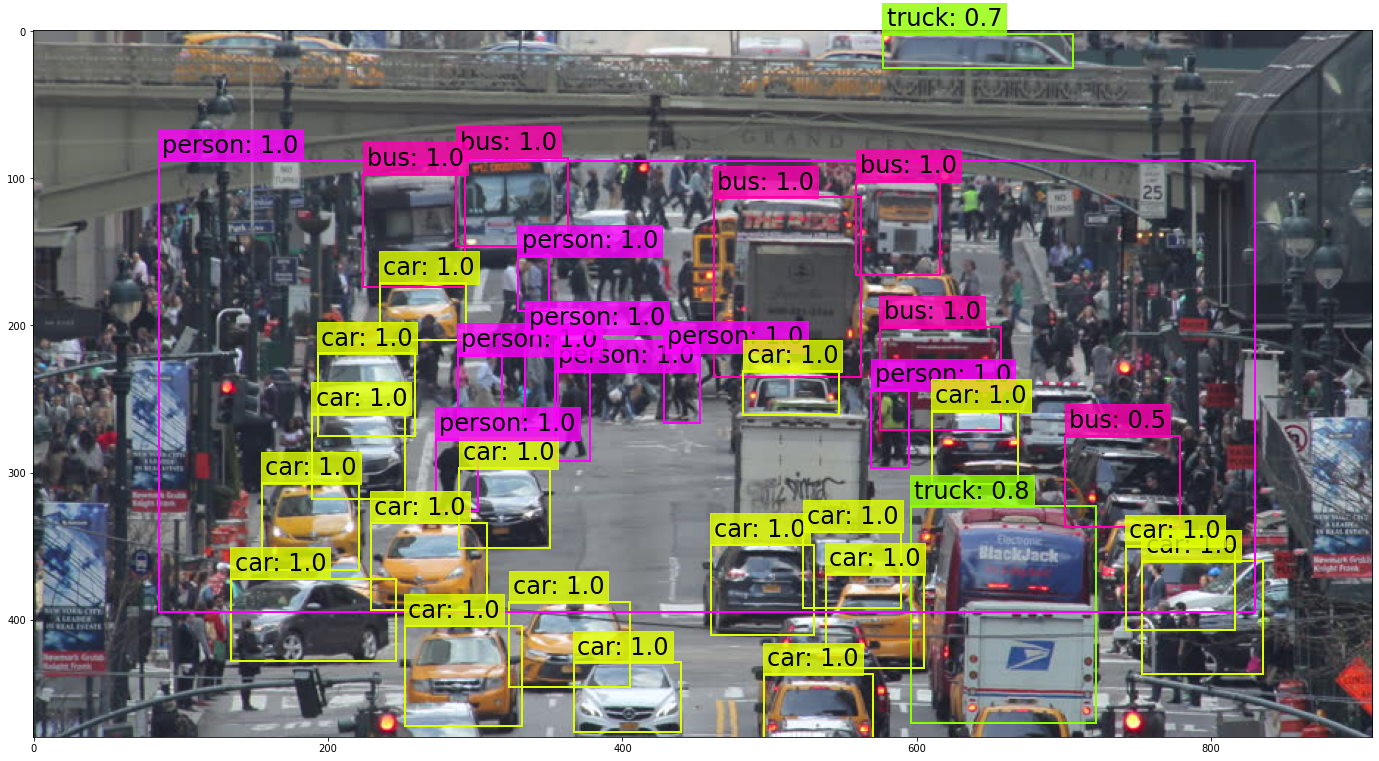

In [16]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread('./images/2.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (m.width, m.height))


iou_thresh = 0.4


nms_thresh = 0.6

# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)